# Importing Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

# Data Loading

In [68]:
df = pd.read_csv(r'F:\Minor_Project\Minor-Project-Data-set-_Stock-Price-Prediction_.csv')

In [69]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,12-02-2018,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,13-02-2018,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,14-02-2018,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,15-02-2018,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,16-02-2018,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [70]:
viz = df.copy()

# Data Preperation

In [71]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [72]:
df.shape

(1009, 7)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [75]:
train, test = train_test_split(df, test_size = 0.2)

In [76]:
test_pred = test.copy()

In [77]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
572,14-05-2020,444.899994,452.380005,432.820007,441.950012,441.950012,9007500
427,16-10-2019,283.119995,288.170013,280.739990,286.279999,286.279999,16175900
570,12-05-2020,442.000000,444.170013,431.359985,431.820007,431.820007,4598200
182,24-10-2018,332.279999,333.000000,300.730011,301.829987,301.829987,19039300
239,17-01-2019,349.500000,355.790009,346.410004,353.190002,353.190002,18871200
385,16-08-2019,298.859985,303.549988,296.269989,302.799988,302.799988,6905800
999,24-01-2022,383.910004,387.260010,351.459991,387.149994,387.149994,32346000
770,26-02-2021,546.510010,553.090027,538.000000,538.849976,538.849976,3755600
607,06-07-2020,480.769989,499.500000,479.799988,493.809998,493.809998,7839000
767,23-02-2021,525.000000,548.539978,518.280029,546.150024,546.150024,4136500


In [78]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
636,14-08-2020,482.820007,488.329987,480.209991,482.679993,482.679993,2943500
143,29-08-2018,367.200012,369.859985,362.910004,368.040009,368.040009,8118700
825,17-05-2021,485.589996,492.709991,482.809998,488.940002,488.940002,2705200
104,05-07-2018,393.799988,399.239990,390.859985,398.390015,398.390015,8448900
176,16-10-2018,337.239990,347.950012,330.559998,346.399994,346.399994,20156400
126,06-08-2018,342.869995,351.980011,341.739990,350.920013,350.920013,8198100
224,26-12-2018,233.919998,254.500000,231.229996,253.669998,253.669998,14402700
587,05-06-2020,407.290009,420.239990,404.250000,419.600006,419.600006,5099600
311,02-05-2019,378.000000,383.500000,374.510010,379.059998,379.059998,5398200
494,23-01-2020,326.040009,349.880005,325.010010,349.600006,349.600006,18200300


In [79]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [80]:
y_train = train['Close'].values
y_test = test['Close'].values

# Linear Regression

In [81]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [82]:
y_pred = model_lnr.predict(x_test)

In [83]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.86336942]


# Model Evaluation

In [84]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 12.782
RMSE 3.575
MAE 2.678
MAPE 0.007
R2 Score :  0.999


# Model Visualization

In [ ]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.set_facecolor("black")

In [86]:
viz['Date'] = pd.to_datetime(viz['Date'], format='%d-%m-%Y')

In [87]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


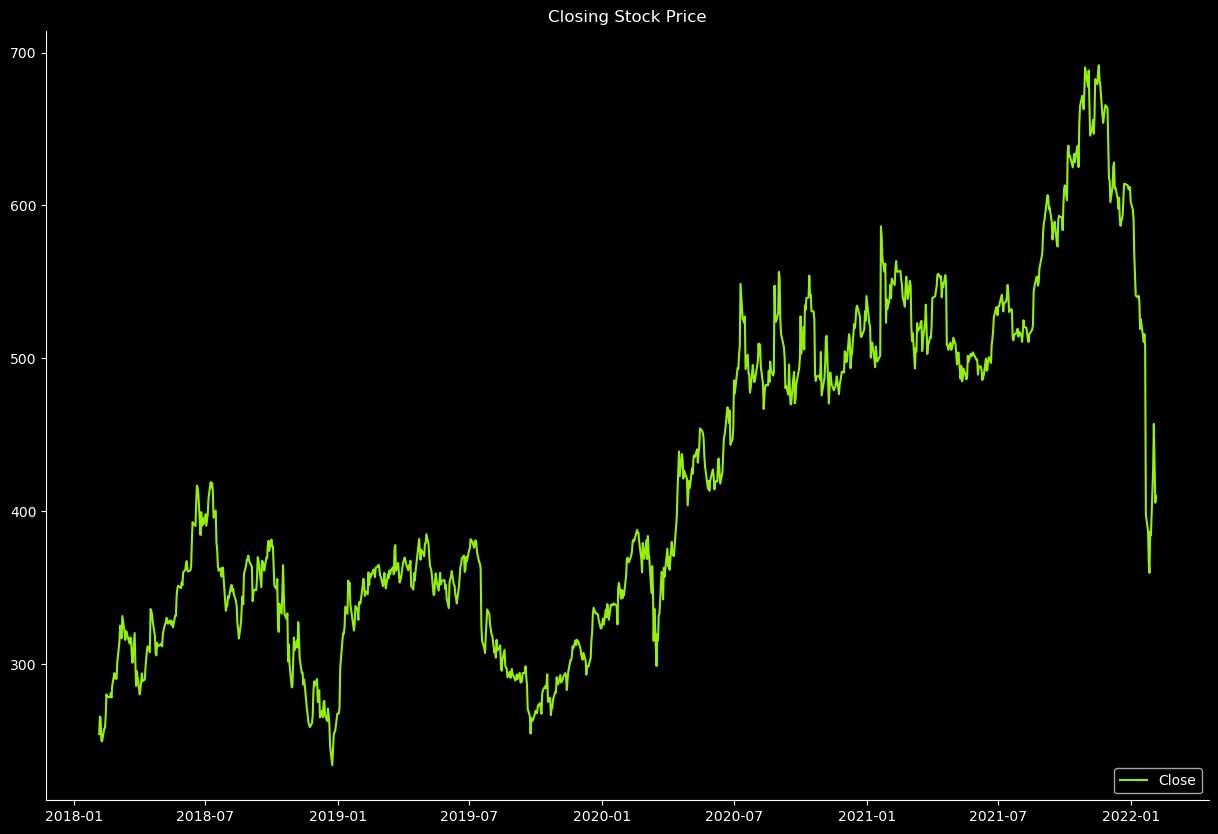

In [88]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

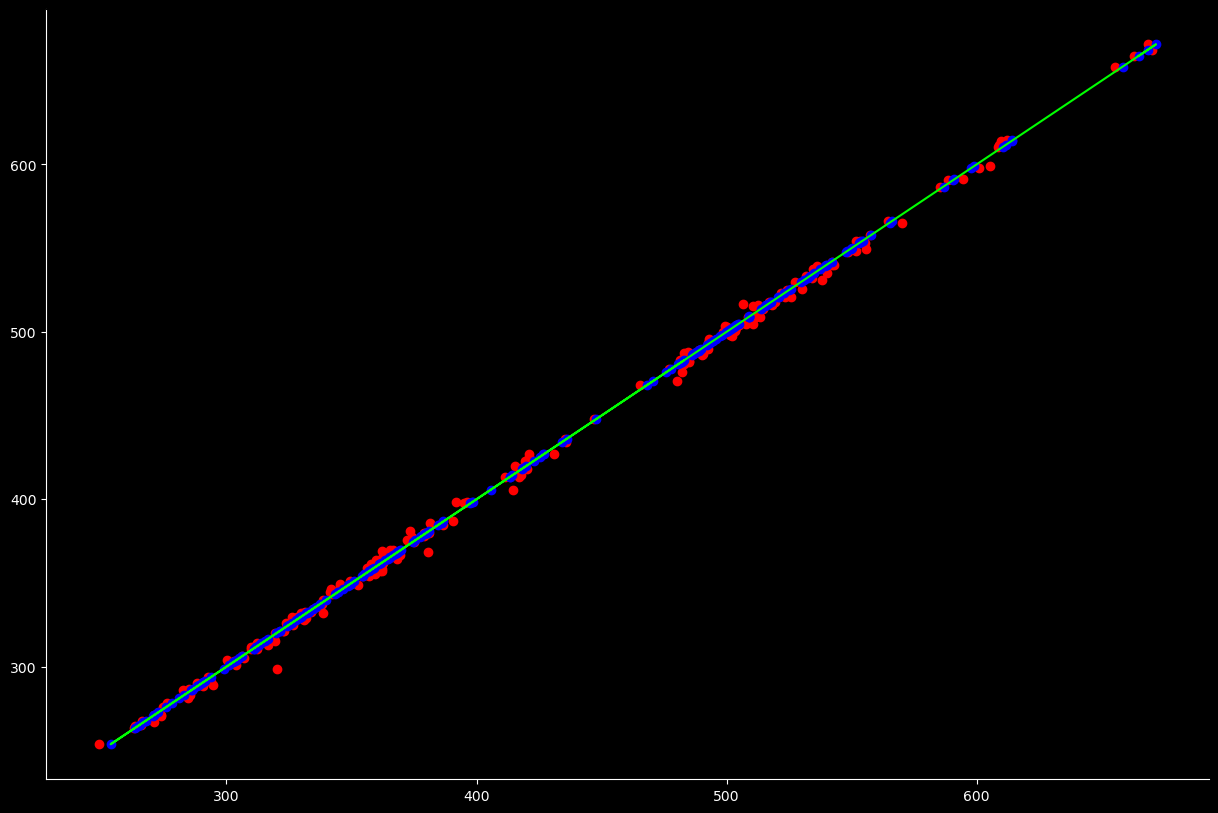

In [89]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [90]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
636,14-08-2020,482.820007,488.329987,480.209991,482.679993,482.679993,2943500,485.100429
143,29-08-2018,367.200012,369.859985,362.910004,368.040009,368.040009,8118700,366.188720
825,17-05-2021,485.589996,492.709991,482.809998,488.940002,488.940002,2705200,489.029394
104,05-07-2018,393.799988,399.239990,390.859985,398.390015,398.390015,8448900,396.120777
176,16-10-2018,337.239990,347.950012,330.559998,346.399994,346.399994,20156400,341.667479
...,...,...,...,...,...,...,...,...
894,24-08-2021,551.479980,555.309998,549.270020,553.409973,553.409973,2109500,552.653414
898,30-08-2021,557.250000,567.159973,556.450012,566.179993,566.179993,2434800,564.481885
274,11-03-2019,352.000000,358.980011,350.029999,358.859985,358.859985,5387300,356.134697
431,22-10-2019,271.160004,275.410004,265.799988,266.690002,266.690002,11802400,270.842331


In [91]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,420.552030,103.950784,253.669998,331.872505,392.100006,507.812507,671.659973
Close_Prediction,202.0,420.864559,103.961293,249.113973,331.665988,391.198505,508.393352,669.960778


# Saving the Data as CSV

In [92]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%d-%m-%Y')

In [93]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2018-02-21,281.040009,284.434860
2018-02-22,NaN,NaN
2018-02-23,285.929993,282.698738
2018-02-24,NaN,NaN
2018-02-25,NaN,NaN
...,...,...
2022-01-30,NaN,NaN
2022-01-31,427.140015,420.856402
2022-02-01,NaN,NaN


In [94]:
output.to_csv('Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!
